## Importing Modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Reading the data

In [2]:
dataset=pd.read_excel('Dataset_224107209.xlsx')

In [3]:
dataset.head()

,Fluid Flow Rate (m3/s),Viscosity (Pa.s),Density (kg/m3),Surface Area (m2),Thermal Conductivity (W/m.K),Fouling Resistance (m2.K/W),Reynolds Number,Heat Transfer Coefficient (W/m2.K)
0,0.10,0.010,1000,5.0,0.20,0.0001,1000,100
1,0.15,0.020,1100,6.0,0.30,0.0002,1500,110
2,0.20,0.015,1050,7.0,0.25,0.0003,1750,120
3,0.25,0.030,1200,8.0,0.35,0.0004,2000,130
4,0.30,0.040,1300,9.0,0.40,0.0005,2250,140


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Fluid Flow Rate (m3/s)              146 non-null    float64
 1   Viscosity (Pa.s)                    146 non-null    float64
 2   Density (kg/m3)                     146 non-null    int64  
 3   Surface Area (m2)                   146 non-null    float64
 4   Thermal Conductivity (W/m.K)        146 non-null    float64
 5   Fouling Resistance (m2.K/W)         146 non-null    float64
 6   Reynolds Number                     146 non-null    int64  
 7   Heat Transfer Coefficient (W/m2.K)  146 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 9.2 KB


In [5]:
dataset.describe()

,Fluid Flow Rate (m3/s),Viscosity (Pa.s),Density (kg/m3),Surface Area (m2),Thermal Conductivity (W/m.K),Fouling Resistance (m2.K/W),Reynolds Number,Heat Transfer Coefficient (W/m2.K)
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,1.917527,0.036973,1103.726027,37.828082,0.271548,0.001709,51341.082192,550.630137
std,2.234620,0.112985,166.066107,45.143779,0.170487,0.001480,62011.027658,545.753475
min,0.012000,0.000570,800.000000,1.000000,0.020000,0.000100,1000.000000,45.000000
25%,0.300000,0.001200,1000.000000,4.425000,0.112500,0.000403,3512.750000,132.500000
50%,1.075000,0.015000,1100.000000,17.250000,0.300000,0.001000,7125.000000,355.000000
75%,2.037500,0.030000,1200.000000,40.750000,0.350000,0.002900,116500.000000,787.500000
max,7.400000,0.800000,2000.000000,149.000000,1.000000,0.005200,185000.000000,2000.000000


## Defining the features and the target

In [6]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

## Splitting the dataset into training and test sets

In [7]:
from sklearn.model_selection import train_test_split as tts 
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2,random_state=0)

## Scaling the Dataset

In [8]:
from sklearn.preprocessing import StandardScaler as ss
sc=ss()
x_train[:,:]=sc.fit_transform(x_train[:,:])
x_test[:,:]=sc.transform(x_test[:,:])
y_train=sc.fit_transform(y_train[:].reshape(-1,1))
y_test=sc.fit_transform(y_test[:].reshape(-1,1))

In [9]:
print(x_train)

[[-6.36471153e-01 -2.71328153e-01  1.32872300e+00 -8.00630679e-01
   2.45000664e-01 -1.01636602e+00 -7.58006988e-01]
 [-4.16430580e-01 -8.45793140e-02  4.85039533e-03 -3.42525654e-01
  -7.17634580e-02  1.16056033e-01 -7.45995067e-01]
 [ 1.21186967e+00 -1.31266524e-01 -6.57085909e-01  1.22812015e+00
  -7.17634580e-02  5.15734406e-01  8.43582394e-01]
 [ 1.43191024e+00 -7.29075115e-02 -3.26117757e-01  1.44626540e+00
   2.45000664e-01  8.48799717e-01  1.00374133e+00]
 [ 1.16786155e+00 -1.42938326e-01 -7.23279539e-01  1.18449110e+00
  -1.35116282e-01  4.49121344e-01  8.11550606e-01]
 [-7.68495498e-01 -1.42938326e-01 -3.26117757e-01 -6.91558054e-01
  -7.17634580e-02 -9.49752961e-01 -8.10058643e-01]
 [ 2.00401573e+00  7.88259203e-02  5.34399439e-01  2.01344305e+00
   1.06858738e+00  1.71476952e+00  1.42015457e+00]
 [-5.92463039e-01 -8.45793140e-02  4.85039533e-03 -5.17041854e-01
  -7.17634580e-02 -4.16848464e-01 -7.78026855e-01]
 [-4.60438694e-01 -3.10078537e-01 -1.20649304e+00 -5.38856379e-0

In [10]:
print(x_test)

[[-6.58475211e-01  3.21387105e-02  6.66786700e-01 -5.82485429e-01
   5.61764786e-01 -6.16687650e-01 -7.90038775e-01]
 [-2.84406235e-01  1.48856735e-01  1.32872300e+00 -2.11638504e-01
   8.78528908e-01  5.15734406e-01 -7.21971227e-01]
 [-2.18394063e-01  3.21387105e-02  6.66786700e-01 -1.46194929e-01
   5.61764786e-01  7.15573593e-01 -7.09959306e-01]
 [-4.60438694e-01 -2.88835857e-01 -6.57085909e-01 -4.51598279e-01
  -1.47819616e+00 -3.50235402e-01  5.07248624e-01]
 [-2.03575469e-02  5.51788586e+00  1.99065931e+00 -7.91904869e-01
   2.77911364e+00 -6.83300712e-01 -7.82030828e-01]
 [ 1.47591835e+00 -6.12357091e-02 -2.59924126e-01  1.48989445e+00
   3.08353489e-01  9.15412779e-01  1.03577312e+00]
 [ 1.12385344e+00 -1.54610129e-01 -7.89473170e-01  1.14086205e+00
  -1.98469107e-01  3.82508282e-01  7.79518818e-01]
 [-3.28414350e-01 -8.45793140e-02  4.85039533e-03 -2.55267554e-01
  -7.17634580e-02  3.82508282e-01 -7.29979174e-01]
 [-8.38908481e-01 -3.08677921e-01 -2.26827311e-01 -7.57001629e-0

In [11]:
print(y_train)

[[ 1.3028782 ]
 [-0.50297371]
 [-0.9013234 ]
 [-0.88361897]
 [-0.90486429]
 [-0.7862446 ]
 [-0.83758745]
 [-0.64460916]
 [-0.55254612]
 [ 2.01105542]
 [-0.85175099]
 [ 2.54218833]
 [-0.84466922]
 [ 0.77174528]
 [ 0.32913452]
 [-0.49589194]
 [ 1.83401111]
 [ 2.01105542]
 [-0.29052055]
 [-0.84821011]
 [-0.29052055]
 [-0.86237365]
 [ 1.3028782 ]
 [-0.57379144]
 [ 0.50617883]
 [-0.02495409]
 [-0.25511169]
 [ 0.41765667]
 [-0.89070074]
 [-0.46756485]
 [ 2.36514403]
 [-0.59149587]
 [-0.82696479]
 [ 2.01105542]
 [-0.20199839]
 [ 0.68322313]
 [-0.556087  ]
 [-0.8765372 ]
 [-0.76854017]
 [ 0.15209022]
 [-0.58264365]
 [-0.71542688]
 [-0.81988302]
 [-0.53484169]
 [-0.6092003 ]
 [-0.18429396]
 [ 2.36514403]
 [-0.23740726]
 [-0.89778251]
 [-0.62690473]
 [ 2.18809972]
 [ 1.83401111]
 [-0.91548694]
 [ 2.18809972]
 [-0.80394903]
 [ 1.65696681]
 [-0.51359637]
 [-0.91194606]
 [-0.75083574]
 [ 0.24061237]
 [-0.52067814]
 [-0.1488851 ]
 [-0.73313131]
 [-0.87299631]
 [-0.47641707]
 [ 2.18809972]
 [-0.82165

In [12]:
print(y_test)

[[-0.72999331]
 [-0.35229565]
 [-0.28564312]
 [ 0.22535961]
 [-0.21899059]
 [-0.95883366]
 [-0.99438168]
 [-0.39673067]
 [ 2.89146078]
 [-0.30786063]
 [-1.00771218]
 [ 1.11406   ]
 [-0.56336199]
 [-0.90995514]
 [-0.86996362]
 [-0.2412081 ]
 [-0.53003572]
 [-0.94550316]
 [ 2.44711058]
 [-0.7077758 ]
 [-0.30786063]
 [-0.06346802]
 [-0.10790304]
 [ 0.8918849 ]
 [ 0.00318451]
 [-0.15233806]
 [-0.10790304]
 [-0.15233806]
 [ 1.33623509]
 [ 2.00276039]]


## Training the model

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
regressor = RandomForestRegressor()

### Defining the hyperparameters

In [14]:
# Specifying the hyperparameter grid
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

### Defining the GridSearchCV

In [15]:
# Performing grid search
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train.ravel())

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 300, 500]},
             verbose=2)

### Printing the best Hyperparameters

In [16]:
# Best hyperparameters found
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


### Predicting results using the best model

In [17]:
# Making predictions using the best model
regressor_best = grid_search.best_estimator_

In [18]:
# Fitting the GridSearchCV object to the data
y_pred = regressor_best.predict(x_test)
np.set_printoptions(precision=2)
y_pred=sc.inverse_transform(y_pred.reshape(-1,1))
y_test=sc.inverse_transform(y_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 180.72  170.  ]
 [ 308.99  340.  ]
 [ 349.95  370.  ]
 [ 527.18  600.  ]
 [ 373.38  400.  ]
 [ 101.99   67.  ]
 [  89.25   51.  ]
 [ 295.82  320.  ]
 [1480.23 1800.  ]
 [ 325.16  360.  ]
 [  87.61   45.  ]
 [ 865.85 1000.  ]
 [ 234.19  245.  ]
 [ 119.48   89.  ]
 [ 133.4   107.  ]
 [ 379.52  390.  ]
 [ 258.91  260.  ]
 [ 106.64   73.  ]
 [1416.48 1600.  ]
 [ 197.27  180.  ]
 [ 377.92  360.  ]
 [ 425.26  470.  ]
 [ 439.28  450.  ]
 [ 860.27  900.  ]
 [ 461.84  500.  ]
 [ 395.77  430.  ]
 [ 423.19  450.  ]
 [ 404.54  430.  ]
 [ 916.85 1100.  ]
 [1302.53 1400.  ]]


## Scoring Metrics

In [19]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 7401.922372290063
R2 Score: 0.9634627981230468


## Data Visualisation

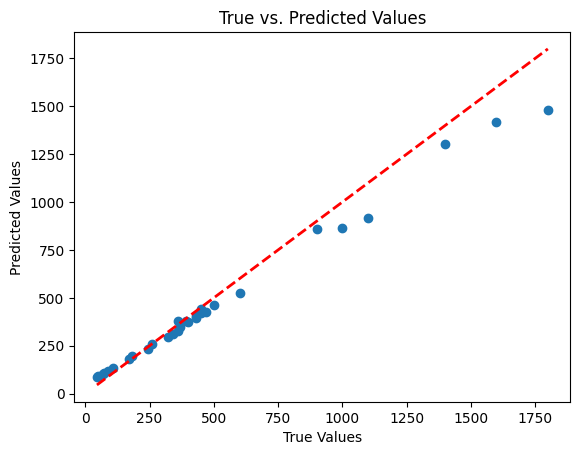

In [20]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values')
plt.show()

## Residuals Plot

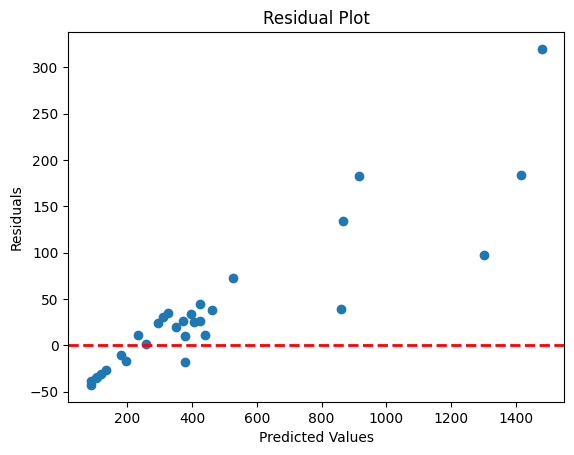

In [21]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

## Histogram of Residuals

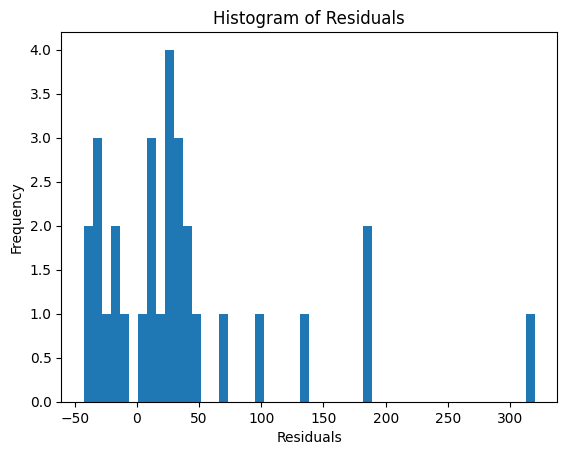

In [22]:
plt.hist(residuals, bins=50)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()